In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
dataset = pd.read_csv('/content/sample_data/SampleSuperstore.csv')

In [ ]:
dataset.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
dataset.shape

(9994, 13)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
mode_list = dataset.groupby('Ship Mode')
mode = [x for x,y in mode_list]
mode

['First Class', 'Same Day', 'Second Class', 'Standard Class']

In [ ]:
ship_mode = dataset.groupby('Ship Mode').sum()['Profit']

**Net Profit by Ship Modes** 


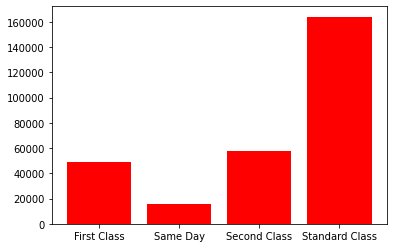

In [ ]:
plt.bar(mode, ship_mode, color='red')
plt.show()

In [ ]:
segment_list = dataset.groupby('Segment')

In [ ]:
segment = [x for x,y in segment_list]
segment 

['Consumer', 'Corporate', 'Home Office']

In [ ]:
segment_data = dataset.groupby('Segment').sum()["Profit"]
segment_data

Segment
Consumer       134119.2092
Corporate       91979.1340
Home Office     60298.6785
Name: Profit, dtype: float64

**Net Profit by different Segments**

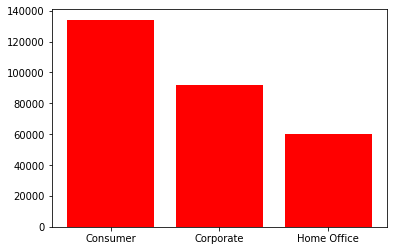

In [ ]:
plt.bar(segment, segment_data, color='red')
plt.show()

**Net Profit and Loss by different States**

In [ ]:
states = dataset.groupby('State')
state_list = [x for x,y in states]

In [ ]:
state_data = dataset.groupby('State').sum()["Profit"]

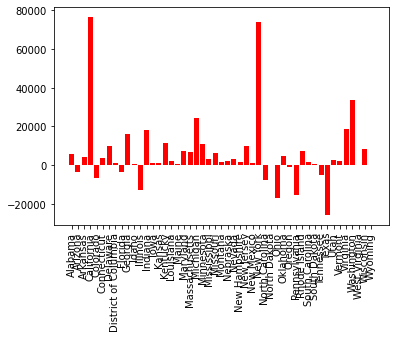

In [ ]:
plt.bar(state_list, state_data, color='red', align='center',linewidth=2)
plt.xticks(rotation=90)
plt.show()

**Net Profit made by different Regions**

In [ ]:
region = dataset.groupby('Region')
region_list = [x for x,y in region]
region_list

['Central', 'East', 'South', 'West']

In [ ]:
region_data = dataset.groupby('Region').sum()['Profit']

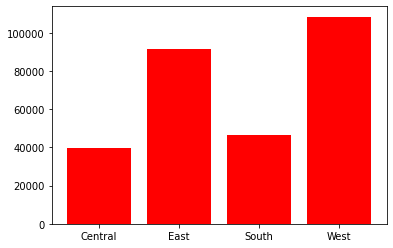

In [ ]:
plt.bar(region_list, region_data, color='red')
plt.show()

**Net Sales made by different categories**

In [ ]:
category_sales = dataset.groupby('Category').sum()['Sales']
category_sales

Category
Furniture          741999.7953
Office Supplies    719047.0320
Technology         836154.0330
Name: Sales, dtype: float64

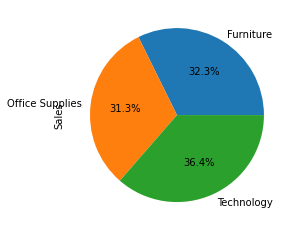

In [ ]:
category_sales.plot(kind='pie', autopct='%1.1f%%')
plt.show()

**Net Sales made by different Sub-Category**

In [ ]:
sub_category_list = dataset.groupby('Sub-Category').sum()['Sales']

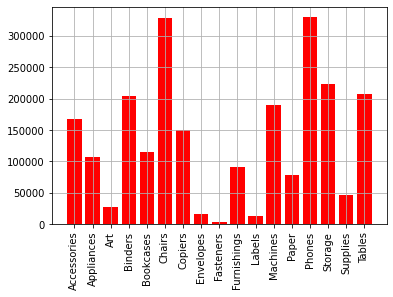

In [ ]:
sub_category = dataset.groupby('Sub-Category')
sub_category_ = [x for x,y in sub_category]
plt.bar(sub_category_, sub_category_list, color='red')
plt.xticks(rotation=90)
plt.grid()
plt.show()

**Total loss made by a segment when they offered discount**

In [ ]:
dataset.query('Profit<0 & Discount>0').groupby('Segment').sum()['Profit']

Segment
Consumer      -84945.7112
Corporate     -44787.2076
Home Office   -26398.3669
Name: Profit, dtype: float64

**Category and Sub-category which made lowest and highest profit**

In [ ]:
cat = dataset.groupby('Category').sum()['Profit']
cat.nlargest(n=1000)

Category
Technology         145454.9481
Office Supplies    122490.8008
Furniture           18451.2728
Name: Profit, dtype: float64

In [ ]:
sub_cat = dataset.groupby('Sub-Category').sum()['Profit']
sub_cat.nlargest(n=1000)

Sub-Category
Copiers        55617.8249
Phones         44515.7306
Accessories    41936.6357
Paper          34053.5693
Binders        30221.7633
Chairs         26590.1663
Storage        21278.8264
Appliances     18138.0054
Furnishings    13059.1436
Envelopes       6964.1767
Art             6527.7870
Labels          5546.2540
Machines        3384.7569
Fasteners        949.5182
Supplies       -1189.0995
Bookcases      -3472.5560
Tables        -17725.4811
Name: Profit, dtype: float64

**Category and Sub-Category which was sold most and least in Quantity**

In [ ]:
dataset.groupby('Category').sum()['Quantity'].nlargest(n=1000)

Category
Office Supplies    22906
Furniture           8028
Technology          6939
Name: Quantity, dtype: int64

In [ ]:
dataset.groupby('Sub-Category').sum()['Quantity'].nlargest(n=1000)

Sub-Category
Binders        5974
Paper          5178
Furnishings    3563
Phones         3289
Storage        3158
Art            3000
Accessories    2976
Chairs         2356
Appliances     1729
Labels         1400
Tables         1241
Fasteners       914
Envelopes       906
Bookcases       868
Supplies        647
Machines        440
Copiers         234
Name: Quantity, dtype: int64

**City and State where highest and lowest sales were seen**

In [ ]:
dataset.groupby('City').sum()['Sales'].nlargest(n=1000)

City
New York City    256368.161
Los Angeles      175851.341
Seattle          119540.742
San Francisco    112669.092
Philadelphia     109077.013
                    ...    
Ormond Beach          2.808
Pensacola             2.214
Jupiter               2.064
Elyria                1.824
Abilene               1.392
Name: Sales, Length: 531, dtype: float64

In [ ]:
dataset.groupby('State').sum()['Sales'].nlargest(n=1000)

State
California              457687.6315
New York                310876.2710
Texas                   170188.0458
Washington              138641.2700
Pennsylvania            116511.9140
Florida                  89473.7080
Illinois                 80166.1010
Ohio                     78258.1360
Michigan                 76269.6140
Virginia                 70636.7200
North Carolina           55603.1640
Indiana                  53555.3600
Georgia                  49095.8400
Kentucky                 36591.7500
New Jersey               35764.3120
Arizona                  35282.0010
Wisconsin                32114.6100
Colorado                 32108.1180
Tennessee                30661.8730
Minnesota                29863.1500
Massachusetts            28634.4340
Delaware                 27451.0690
Maryland                 23705.5230
Rhode Island             22627.9560
Missouri                 22205.1500
Oklahoma                 19683.3900
Alabama                  19510.6400
Oregon                

**Ship mode where sales were highest and lowest**

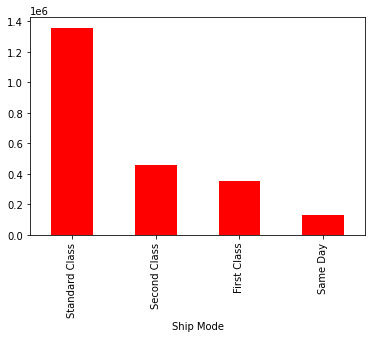

In [ ]:
dataset.groupby('Ship Mode').sum()['Sales'].nlargest(n=1000).plot(kind='bar',color='red')

In [ ]:
dataset.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


**Cities which didn't offer discount and were at loss**

In [ ]:
dataset.query("Discount==0 & Profit<0").count()['Postal Code']

0

**Data where Minimum sales occurred**

In [ ]:
dataset[dataset['Sales']==dataset.min()['Sales']]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
4101,Standard Class,Consumer,United States,Houston,Texas,77095,Central,Office Supplies,Appliances,0.444,1,0.8,-1.11


**Data where Maximun sales occurred**

In [ ]:
dataset[dataset['Sales']==dataset.max()['Sales']]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
2697,Standard Class,Home Office,United States,Jacksonville,Florida,32216,South,Technology,Machines,22638.48,6,0.5,-1811.0784


**Data with Minimum  profit**

In [ ]:
dataset[dataset['Profit']==dataset.min()['Profit']]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
7772,Standard Class,Consumer,United States,Lancaster,Ohio,43130,East,Technology,Machines,4499.985,5,0.7,-6599.978


**Data with Maximum profit**

In [ ]:
dataset[dataset['Profit']==dataset.max()['Profit']]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
6826,Standard Class,Corporate,United States,Lafayette,Indiana,47905,Central,Technology,Copiers,17499.95,5,0.0,8399.976


**Category and Region wise dataset**

In [ ]:
dataset.groupby(['Region', 'Category']).count()['Postal Code']

Region   Category       
Central  Furniture           481
         Office Supplies    1422
         Technology          420
East     Furniture           601
         Office Supplies    1712
         Technology          535
South    Furniture           332
         Office Supplies     995
         Technology          293
West     Furniture           707
         Office Supplies    1897
         Technology          599
Name: Postal Code, dtype: int64

In [ ]:
unstacked_sales = dataset.groupby(['Region', 'Category']).count()['Postal Code'].unstack(level=0)
unstacked_sales

Region,Central,East,South,West
Category,,,,
Furniture,481,601,332,707
Office Supplies,1422,1712,995,1897
Technology,420,535,293,599


**Category and State wise dataset**

In [ ]:
dataset.groupby(['State', 'Category']).count()['Postal Code']

State          Category       
Alabama        Furniture           11
               Office Supplies     36
               Technology          14
Arizona        Furniture           49
               Office Supplies    127
                                 ... 
West Virginia  Office Supplies      3
Wisconsin      Furniture           32
               Office Supplies     53
               Technology          25
Wyoming        Furniture            1
Name: Postal Code, Length: 142, dtype: int64

In [ ]:
unstacked_sales_ = dataset.groupby(['Category', 'State']).count()['Postal Code'].unstack(level=0)
unstacked_sales_

Category,Furniture,Office Supplies,Technology
State,,,
Alabama,11.0,36.0,14.0
Arizona,49.0,127.0,48.0
Arkansas,9.0,36.0,15.0
California,444.0,1198.0,359.0
Colorado,51.0,96.0,35.0
Connecticut,13.0,58.0,11.0
Delaware,18.0,58.0,20.0
District of Columbia,3.0,6.0,1.0
Florida,85.0,229.0,69.0
